# Introduction:
In this section of the report, I'll provide a brief introduction to the dataset I've selected for analysis. At the end of this section, I wil describe the questions that I plan on exploring over the course of the report.

Introduction to dataset:
I am using TMDB movie dataset, This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue

In [10]:
# Import all the packages needed for analysis
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import matplotlib.pyplot as plt
# to Print our visualizations
%matplotlib inline

Let's load the data and check some rows from the dataset to identify the questions that can be answered:

In [11]:
# Reading a csv file and storing the dataset in pandas dataframe variable tmdb_data
tmdb_data = pd.read_csv('tmdb-movies.csv')
# Printing the first five rows of the dataset
tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Questions that can be answered by looking at the datasets are:

Some general questions that can be answered are:

1.Which movie had the highest and lowest profit?
2.Which movie had the greatest and least runtime?
3.What is the average runtime of all movies?
4.Which movie had the highest and lowest budget?
5.Which movie had the highest and lowest revenue?

Some questions that can be answered based on the Profit of movies making more then 25M Dollars:

1.What is the average budget of the movie?
2.What is the average revenue of the movie?
3.What is the average runtime of the movie?
4.Which are the successfull genres?
5.Which are the most frequent cast involved?

Data Wrangling
In this section of the report, I am going to check for cleanliness, and then trim and clean my dataset for analysis.

Observations from above dataset are:
The dataset has not provided the currency for columns we will be dealing with hence we will assume it is in dollars.
Even the vote count is not same for all the movies and hence this affects the vote average column.
General Properties
Let's check the dataset and see what cleaning does it requires.

In [12]:
# let us check some statistics of the data
tmdb_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [13]:
# Let us check infomation on datatypes of columns and missing values.
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [14]:
# Calculate number of duplicated rows.
sum(tmdb_data.duplicated())


1

Cleaning that needs to be performed by looking at above data:
1.First, remove columns such as 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'director', 'tagline', 'overview', 'production_companies', 'vote_count' and 'vote_average'.

2.Second, Lets delete the one duplicated row that we have in our dataset.

3.Third, There are lots of movies where the budget or revenue have a value of '0' which means that the values of those movies has not been recorded. So we need to discard this rows, since we cannot calculate profit of such movies.

4.Fourth, The 'release_date' column must be converted into date format.

5.Fifth, Convert budget and revenue column to int datatype.

6.Sixth, Replace runtime value of 0 to NAN, Since it will affect the result.

Data Cleaning (Lets us perform all the steps that are discussed above for cleaning):
First, remove columns such as 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'director', 'tagline', 'overview', 'production_companies', 'vote_count' and 'vote_average'.

In [15]:
# Columns that needs to be deleted
deleted_columns = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'director', 'tagline', 'overview', 'production_companies', 'vote_count', 'vote_average']
# Drop the columns from the database
tmdb_data.drop(deleted_columns, axis=1, inplace=True)
# Lets look at the new dataset
tmdb_data.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2015


Let's see the number of entries in our dataset now.

In [16]:
# Store rows and columns using shape function.
rows, col = tmdb_data.shape
#since rows includes count of a header, we need to remove its count.
print('We have {} total rows and {} columns.'.format(rows-1, col))


We have 10865 total rows and 8 columns.


Second, Lets delete the one duplicated row that we have in our dataset.

In [17]:
# Drop duplicate rows but keep the first one
tmdb_data.drop_duplicates(keep = 'first', inplace = True)
# Store rows and columns using shape function.
rows, col = tmdb_data.shape
print('Now we have {} total rows and {} columns.'.format(rows-1, col))

Now we have 10864 total rows and 8 columns.


Third, There are lots of movies where the budget or revenue have a value of '0' which means that the values of those movies has not been recorded. So we need to discard this rows, since we cannot calculate profit of such movies.

In [18]:
# Columns that need to be checked.
columns = ['budget', 'revenue']
# Replace 0 with NAN
tmdb_data[columns] = tmdb_data[columns].replace(0, np.NaN)
# Drop rows which contains NAN
tmdb_data.dropna(subset = columns, inplace = True)
rows, col = tmdb_data.shape
print('We now have only {} rows.'.format(rows-1))

We now have only 3853 rows.


Fourth, The 'release_date' column must be converted into date format.

In [19]:
# Convert column release_date to DateTime
tmdb_data.release_date = pd.to_datetime(tmdb_data['release_date'])
# Lets look at the new dataset
tmdb_data.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015


Fifth, Convert budget and revenue column to int datatype.

In [20]:
# Columns to convert datatype of
columns = ['budget', 'revenue']
# Convert budget and revenue column to int datatype
tmdb_data[columns] = tmdb_data[columns].applymap(np.int64)
# Lets look at the new datatype
tmdb_data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

Sixth, Replace runtime value of 0 to NAN, Since it will affect the result.

In [21]:
# Replace runtime value of 0 to NAN, Since it will affect the result.
tmdb_data['runtime'] = tmdb_data['runtime'].replace(0, np.NaN)
# Check the stats of dataset
tmdb_data.describe()

,budget,revenue,runtime,release_year
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,3.720370e+07,1.076866e+08,109.220291,2001.261028
std,4.220822e+07,1.765393e+08,19.922820,11.282575
min,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,1.000000e+07,1.360003e+07,95.000000,1995.000000
50%,2.400000e+07,4.480000e+07,106.000000,2004.000000
75%,5.000000e+07,1.242125e+08,119.000000,2010.000000
max,4.250000e+08,2.781506e+09,338.000000,2015.000000


We have now completed our Data Wrangling section

Exploratory Data Analysis:

We will now compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.

Question 1. (Which movie had the highest and lowest profit?)
So we will first add a column for profit in our dataset.

In [22]:
# To calculate profit, we need to substract the budget from the revenue.
tmdb_data['profit'] = tmdb_data['revenue'] - tmdb_data['budget']
# Lets look at the new dataset
tmdb_data.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015,1316249360


In [23]:
# Movie with highest profit
tmdb_data.loc[tmdb_data['profit'].idxmax()]

budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
release_year                                                   2009
profit                                                   2544505847
Name: 1386, dtype: object

In [24]:
# Movie with lowest profit
tmdb_data.loc[tmdb_data['profit'].idxmin()]

budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
release_year                                                   2010
profit                                                   -413912431
Name: 2244, dtype: object

Which movie had the highest and lowest profit?
Highest :: Avatar with profit of 2544505847 dollars

Lowest :: The Warrior's Way with profit of -413912431 dollars

Question 2. (Which movie had the greatest and least runtime?)

In [25]:
# Movie with greatest runtime
tmdb_data.loc[tmdb_data['runtime'].idxmax()]

budget                                                     18000000
revenue                                                      871279
original_title                                               Carlos
cast              Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
runtime                                                         338
genres                                 Crime|Drama|Thriller|History
release_date                                    2010-05-19 00:00:00
release_year                                                   2010
profit                                                    -17128721
Name: 2107, dtype: object

In [26]:
# Movie with greatest runtime
tmdb_data.loc[tmdb_data['runtime'].idxmin()]

budget                                                           10
revenue                                                           5
original_title                                          Kid's Story
cast              Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
runtime                                                          15
genres                                    Science Fiction|Animation
release_date                                    2003-06-02 00:00:00
release_year                                                   2003
profit                                                           -5
Name: 5162, dtype: object

Which movie had the greatest and least runtime?
Greatest :: Carlos with runtime of 338 minutes

Least :: Kid's Story with runtime of 15 minutes

Question 3. (What is the average runtime of all movies?)

In [27]:
# Average runtime of movies
tmdb_data['runtime'].mean()

109.22029060716139

What is the average runtime of all movies?
So the average runtime of the movies is 109.22 minutes

Let us plot a histogram for the same.

(array([  1.,   1.,   0.,   0.,   1.,   0.,   0.,   3.,   5.,  31., 196.,
        437., 598., 653., 475., 458., 305., 243., 141., 117.,  49.,  47.,
         21.,  23.,   9.,  10.,  10.,   8.,   6.,   0.,   2.,   2.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 15.  ,  21.46,  27.92,  34.38,  40.84,  47.3 ,  53.76,  60.22,
         66.68,  73.14,  79.6 ,  86.06,  92.52,  98.98, 105.44, 111.9 ,
        118.36, 124.82, 131.28, 137.74, 144.2 , 150.66, 157.12, 163.58,
        170.04, 176.5 , 182.96, 189.42, 195.88, 202.34, 208.8 , 215.26,
        221.72, 228.18, 234.64, 241.1 , 247.56, 254.02, 260.48, 266.94,
        273.4 , 279.86, 286.32, 292.78, 299.24, 305.7 , 312.16, 318.62,
        325.08, 331.54, 338.  ]),
 <a list of 50 Patch objects>)

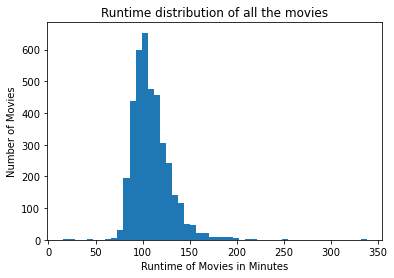

In [28]:
# x-axis
plt.xlabel('Runtime of Movies in Minutes')
# y-axis
plt.ylabel('Number of Movies')
# Title of the histogram
plt.title('Runtime distribution of all the movies')
# Plot a histogram
plt.hist(tmdb_data['runtime'], bins = 50)

We can see that most of the movie are in the range of 100 minutes to 120 minutes.

Let us check if there a relation between the Runtime and Profit:

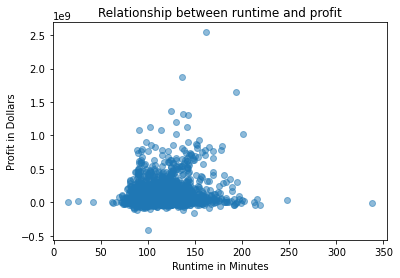

In [29]:
# x-axis
plt.xlabel('Runtime in Minutes')
# y-axis
plt.ylabel('Profit in Dollars')
# Title of the histogram
plt.title('Relationship between runtime and profit')
plt.scatter(tmdb_data['runtime'], tmdb_data['profit'], alpha=0.5)
plt.show()

Most of the movies have runtime in range of 85 to 120 Minutes.

Question 4. (Which movie had the highest and lowest budget?)

In [30]:
# Movie with highest budget
tmdb_data.loc[tmdb_data['budget'].idxmax()]

budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
release_year                                                   2010
profit                                                   -413912431
Name: 2244, dtype: object

In [31]:
# Movie with lowest budget
tmdb_data.loc[tmdb_data['budget'].idxmin()]

budget                                                            1
revenue                                                         100
original_title                                         Lost & Found
cast              David Spade|Sophie Marceau|Ever Carradine|Step...
runtime                                                          95
genres                                               Comedy|Romance
release_date                                    1999-04-23 00:00:00
release_year                                                   1999
profit                                                           99
Name: 2618, dtype: object

Which movie had the highest and lowest budget?
Highest :: The Warrior's Way with budget of 425000000 dollars.

Lowest :: Lost & Found with budget of 1 dollars

Let us check if there a relation between the Budget and Profit:

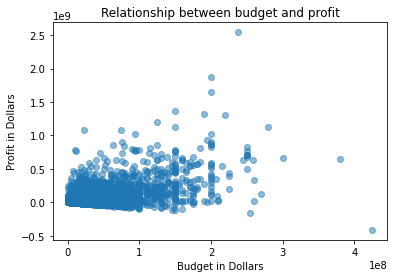

In [32]:
# x-axis
plt.xlabel('Budget in Dollars')
# y-axis
plt.ylabel('Profit in Dollars')
# Title of the histogram
plt.title('Relationship between budget and profit')
plt.scatter(tmdb_data['budget'], tmdb_data['profit'], alpha=0.5)
plt.show()

We can see that there no as such relationship between budget and profits, But yes there are very less flims which didnt make profit when the budget was greater then 20M Dollar.

Question 5. (Which movie had the highest and lowest revenue?)

In [33]:
# Movie with highest revenue
tmdb_data.loc[tmdb_data['revenue'].idxmax()]

budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
release_year                                                   2009
profit                                                   2544505847
Name: 1386, dtype: object

In [34]:
# Movie with highest revenue
tmdb_data.loc[tmdb_data['revenue'].idxmin()]

budget                                                      6000000
revenue                                                           2
original_title                                      Shattered Glass
cast              Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
runtime                                                          94
genres                                                Drama|History
release_date                                    2003-11-14 00:00:00
release_year                                                   2003
profit                                                     -5999998
Name: 5067, dtype: object

Which movie had the highest and lowest revenue?
Highest :: Avatar with revenue of 2781505847 dollars

Lowest :: Shattered Glass with revenue of 2 dollars

Let us check if there a relation between the Revenue and Profit:

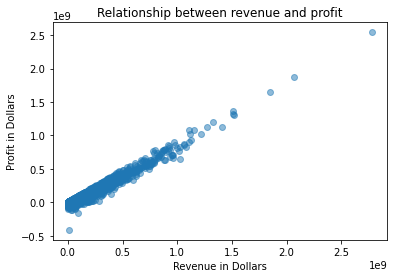

In [35]:
# x-axis
plt.xlabel('Revenue in Dollars')
# y-axis
plt.ylabel('Profit in Dollars')
# Title of the histogram
plt.title('Relationship between revenue and profit')
plt.scatter(tmdb_data['revenue'], tmdb_data['profit'], alpha=0.5)
plt.show()

We can see that there is a strong relationship between profit and revenue, higher the profit, higher the revenue.

Let us check if there a relation between the Budget and Revenue:

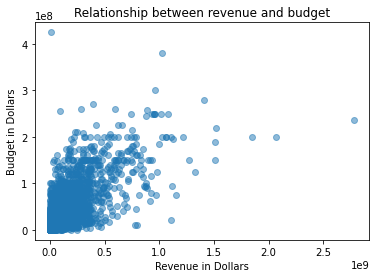

In [36]:
# x-axis
plt.xlabel('Revenue in Dollars')
# y-axis
plt.ylabel('Budget in Dollars')
# Title of the histogram
plt.title('Relationship between revenue and budget')
plt.scatter(tmdb_data['revenue'], tmdb_data['budget'], alpha=0.5)
plt.show()

Most of the movie have a revenue upto 50M Dollars.

Question 2.1 (What is the average budget of the movie w.r.t Profit of movies making more then 25M Dollars?)
Now since in all the remaining question we are going to answer them with respect to profit, we will now clean our datset and only incudde data of movies who made profit of more then 25M Dollars.

In [37]:
# Dataframe which has data of movies which made profit of more the 25M Dollars.
tmdb_profit_data = tmdb_data[tmdb_data['profit'] >= 25000000]
# Reindexing the dataframe
tmdb_profit_data.index = range(len(tmdb_profit_data))
#showing the dataset
tmdb_profit_data.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015,1316249360


In [38]:
# Printing the info of the new dataframe
tmdb_profit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1791 entries, 0 to 1790
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          1791 non-null   int64         
 1   revenue         1791 non-null   int64         
 2   original_title  1791 non-null   object        
 3   cast            1790 non-null   object        
 4   runtime         1791 non-null   int64         
 5   genres          1791 non-null   object        
 6   release_date    1791 non-null   datetime64[ns]
 7   release_year    1791 non-null   int64         
 8   profit          1791 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 126.1+ KB


We can see that we have 1791 movies which has profit more then 25M Dollars.

In [41]:
# Find the average budget of movies which made profit more then 25M Dollars
tmdb_profit_data['budget'].mean()

51870307.757118925

What is the average budget of the movie w.r.t Profit of movies making more then 25M Dollars?
So the average budget of the movies is 51870307.75 Dollars

Question 2.2 (What is the average revenue of the movie w.r.t Profit of movies making more then 25M Dollars?)

In [42]:
# Find the average revenue of movies which made profit more then 25M Dollars
tmdb_profit_data['revenue'].mean()

206359440.87269682

What is the average revenue of the movie w.r.t Profit of movies making more then 25M Dollars?
So the average revenue of the movies is 206359440.87 Dollars

Question 2.3 (What is the average runtime of the movie w.r.t Profit of movies making more then 25M Dollars?)

In [43]:
# Find the average runtime of movies which made profit more then 25M Dollars
tmdb_profit_data['runtime'].mean()

112.56672250139587

What is the average runtime of the movie w.r.t Profit of movies making more then 25M Dollars?
So the average runtime of the movies is 112.56 Minutes

Question 2.4 (Which are the successfull genres w.r.t Profit of movies making more then 25M Dollars?)

In [44]:
# This will first concat all the data with | from the whole column and then split it using | and count the number of times it occured. 
genres_count = pd.Series(tmdb_profit_data['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_count

Drama              688
Comedy             645
Action             566
Thriller           542
Adventure          451
Romance            292
Crime              287
Family             265
Science Fiction    250
Fantasy            227
Horror             191
Mystery            150
Animation          136
Music               62
History             59
War                 58
Western             20
Documentary          9
Foreign              1
TV Movie             1
dtype: int64

Question 2.4 (Which are the successfull genres w.r.t Profit of movies making more then 25M Dollars?)

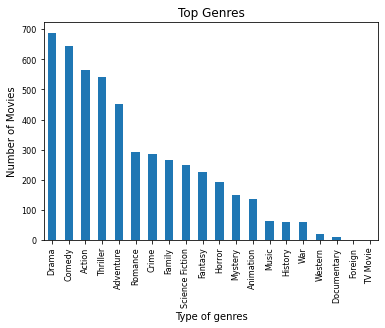

In [45]:
# Initialize the plot
diagram = genres_count.plot.bar(fontsize = 8)
# Set a title
diagram.set(title = 'Top Genres')
# x-label and y-label
diagram.set_xlabel('Type of genres')
diagram.set_ylabel('Number of Movies')
# Show the plot
plt.show()

We can clearly see in the visualization that most movies has drame as a genre which tends to higher profit.

Question 2.5 (Which are the most frequent cast involved w.r.t Profit of movies making more then 25M Dollars?)

In [46]:
# This will first concat all the data with | from the whole column and then split it using | and count the number of times it occured. 
cast_count = pd.Series(tmdb_profit_data['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
cast_count.head(20)

Tom Cruise            29
Tom Hanks             28
Brad Pitt             27
Robert De Niro        26
Bruce Willis          25
Cameron Diaz          24
Samuel L. Jackson     23
Eddie Murphy          23
Mark Wahlberg         22
Sylvester Stallone    22
Johnny Depp           22
Denzel Washington     20
Jim Carrey            20
Adam Sandler          20
George Clooney        20
Robin Williams        20
Harrison Ford         20
Matt Damon            20
Nicolas Cage          19
Owen Wilson           19
dtype: int64

Which are the most frequent cast involved w.r.t Profit of movies making more then 25M Dollars?
So the Top 5 cast are Tom Cruise, Tom Hanks, Brad Pitt, Robert De Niro, Bruce Willis

Lets visualize this with a plot

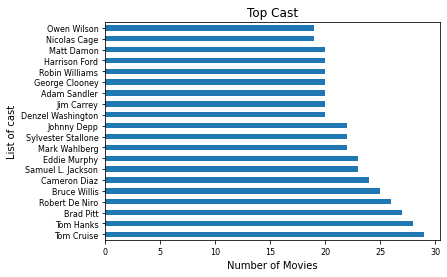

In [47]:
# Initialize the plot
diagram = cast_count.head(20).plot.barh(fontsize = 8)
# Set a title
diagram.set(title = 'Top Cast')
# x-label and y-label
diagram.set_xlabel('Number of Movies')
diagram.set_ylabel('List of cast')
# Show the plot
plt.show()

We can clearly see in the visualization that most movies have Tom Cruise as a cast which tends to higher profit.


Conclusions:

So the conclusion is, that if we want to create movies which can give us a profit of more then 25M Dollars then
The average budget of the movies can be around 51870307.75 Dollars

The average runtime of the movies can be around 112.56 Minutes

The Top 10 Genres we should focus on should be Drama, Comedy, Action, Thriller, Adventure, Romance, Crime, Family, Scince Fiction, Fantasy

The Top 5 cast we should focus on should be Tom Cruise, Tom Hanks, Brad Pitt, Robert De Niro, Bruce Willis

The average revenue of the movies will be around 206359440.87 Dollars

The limitations associated with the conclusions are:
The conclusion is not full proof that given the above requirement the movie will be a big hit but it can be.

Also, we also lost some of the data in the data cleaning steps where we dont know the revenue and budget of the movie, which has affected our analysis.

This conclusion is not error proof.